#pip

In [ ]:
!pip install spacy neuralcoref bert-score
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 368.7/368.7 kB 5.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 120.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by sel

In [ ]:
!pip install rouge-score -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!pip install bert-score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.2 MB/s eta 0:00:00


In [ ]:
!pip install evaluate -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.7 MB/s eta 0:00:00


In [ ]:
import torch
import pandas as pd
import requests
import gc
from transformers import AutoTokenizer, AutoModel
from tqdm import tqdm

import json
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
import evaluate
from torch.nn import CrossEntropyLoss

import numpy as np
from collections import Counter
from transformers import GPT2LMHeadModel, GPT2Tokenizer

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


#обучение с уменьшенными параметрами

In [ ]:
!git clone https://github.com/verschiedenermist/tencdm.git
%cd tencdm

Cloning into 'tencdm'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 56 (delta 11), reused 3 (delta 3), pack-reused 25 (from 1)
Receiving objects: 100% (56/56), 40.95 KiB | 4.55 MiB/s, done.
Resolving deltas: 100% (12/12), done.
/content/faiss/tencdm


In [ ]:
!git clone https://github.com/facebookresearch/faiss.git
%cd faiss

Cloning into 'faiss'...
remote: Enumerating objects: 65885, done.
remote: Counting objects: 100% (32565/32565), done.
remote: Compressing objects: 100% (806/806), done.
remote: Total 65885 (delta 32238), reused 31764 (delta 31759), pack-reused 33320 (from 3)
Receiving objects: 100% (65885/65885), 231.62 MiB | 17.68 MiB/s, done.
Resolving deltas: 100% (60163/60163), done.
/content/faiss


In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 8.4 MB/s eta 0:00:00
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement faiss-gpu==1.7.2 (from versions: none)
ERROR: No matching distribution found for faiss-gpu==1.7.2


In [ ]:
!pip install ml_collections -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 2.9 MB/s eta 0:00:00


In [ ]:
!pip install datasets -q
from datasets import load_dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python -m data.load --dataset_name='rocstories'

roc_stories.py: 100% 6.51k/6.51k [00:00<00:00, 28.1MB/s]
dataset_infos.json: 100% 1.33k/1.33k [00:00<00:00, 7.23MB/s]
The repository for wza/roc_stories contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/wza/roc_stories.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y
ROCStories__spring2016.csv: 100% 13.1M/13.1M [00:00<00:00, 82.5MB/s]
ROCStories_winter2017.csv: 100% 14.5M/14.5M [00:00<00:00, 122MB/s]
Generating train split: 98161 examples [00:20, 4676.45 examples/s]
Loading... (num_proc=30): 100% 98161/98161 [00:01<00:00, 51324.70 examples/s] 
Saving the dataset (1/1 shards): 100% 88161/88161 [00:00<00:00, 313798.37 examples/s]
Saving the dataset (1/1 shards): 100% 10000/10000 [00:00<00:00, 296069.91 examples/s]


In [ ]:
!python -m data.make_statistics --dataset_name='rocstories' --encoder_name='roberta-base'

2025-04-06 13:04:19.895450: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743944659.915557    2419 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743944659.921726    2419 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
config.json: 100% 570/570 [00:00<00:00, 3.07MB/s]
tokenizer_config.json: 100% 49.0/49.0 [00:00<00:00, 241kB/s]
config.json: 100% 570/570 [00:00<00:00, 4.57MB/s]
vocab.txt: 100% 213k/213k [00:00<00:00, 10.3MB/s]
tokenizer.json: 100% 436k/436k [00:00<00:00, 18.6MB/s]
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `

In [ ]:
!python -m model.train_decoder --dataset_name='rocstories' --encoder_name='roberta-base'

2025-04-06 13:07:35.285756: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743944855.306298    3463 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743944855.312520    3463 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: 1
wandb: You chose 'Create a W&B account'
wandb: Create an account here: https://wandb.ai/authorize?signup=true
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to qui

In [ ]:
!torchrun --nproc_per_node=1 train_diffusion.py --dataset_name='rocstories' --encoder_name='roberta-base'

Streaming output truncated to the last 5000 lines.
Featurizing q:  47% 468/1000 [00:15<00:14, 35.58it/s]
Featurizing q:  47% 472/1000 [00:15<00:14, 36.47it/s]
Featurizing q:  48% 476/1000 [00:15<00:14, 35.46it/s]
Featurizing q:  48% 480/1000 [00:15<00:14, 35.88it/s]
Featurizing q:  48% 484/1000 [00:15<00:14, 36.28it/s]
Featurizing q:  49% 488/1000 [00:15<00:14, 35.46it/s]
Featurizing q:  49% 492/1000 [00:15<00:14, 36.27it/s]
Featurizing q:  50% 496/1000 [00:15<00:14, 35.70it/s]
Featurizing q:  50% 500/1000 [00:15<00:14, 35.27it/s]
Featurizing q:  50% 504/1000 [00:16<00:14, 35.34it/s]
Featurizing q:  51% 508/1000 [00:16<00:16, 30.10it/s]
Featurizing q:  51% 512/1000 [00:16<00:17, 27.87it/s]
Featurizing q:  52% 515/1000 [00:16<00:17, 27.56it/s]
Featurizing q:  52% 518/1000 [00:16<00:17, 27.96it/s]
Featurizing q:  52% 521/1000 [00:16<00:17, 27.83it/s]
Featurizing q:  52% 524/1000 [00:16<00:17, 27.74it/s]
Featurizing q:  53% 527/1000 [00:16<00:18, 25.76it/s]
Featurizing q:  53% 530/1000 [0

In [ ]:
import shutil

model_path = "/content/faiss/tencdm/checkpoints/tencdm-roberta-base-32-5e-05-rocstories-cfg=0.0/last.pth"

destination_path = "/content/drive/MyDrive/last.pth"

shutil.copy(model_path, destination_path)

print(f"Модель сохранена в {destination_path}")

Модель сохранена в /content/drive/MyDrive/last.pth


In [ ]:
!ls "/content/drive/MyDrive"

 all.a010.p10.d300.w5.m100.nonorm.slim.joblib   last.pth		   my_trained_longt5_model
'Colab Notebooks'			        lemmatized_contexts.json


# традиционные метрики на предоставленном датасете


In [ ]:
import argparse

In [ ]:
file_path = "/content/150000-N=50-len=1.json"
with open(file_path, "r") as f:
    data = json.load(f)["rocstories"]

In [ ]:
file_path_2 = "/content/10000-N=25-len=1.json"
with open(file_path_2, "r") as f:
    data_2 = json.load(f)["rocstories"]

In [ ]:
prompts = [d["TRG"] for d in data]
predictions = [d["GEN"] for d in data]

In [ ]:
prompts_2 = [d["TRG"] for d in data_2]
predictions_2 = [d["GEN"] for d in data_2]

In [ ]:
from evaluate import load

In [ ]:
!pip install -U "huggingface_hub[cli]" -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.2/481.2 kB 22.7 MB/s eta 0:00:00


In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: fineGrained).
The token `token_name_` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `token_

In [ ]:
!huggingface-cli whoami

niiemand


In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neo-1.3B")
model = AutoModelForCausalLM.from_pretrained("EleutherAI/gpt-neo-1.3B")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/5.31G [00:00<?, ?B/s]

##perplexity

In [ ]:
predictions = [p for p in predictions if p]

perplexity = load("perplexity", module_type="metric", model_id="EleutherAI/gpt-neo-1.3B")
ppl_list = perplexity.compute(
    predictions=predictions,
    model_id="EleutherAI/gpt-neo-1.3B",
    device='cuda',
    add_start_token=True,
)["perplexities"]
ppl_list = np.sort(ppl_list)
quantile = 0.05
a_min, a_max = int(quantile * len(ppl_list)), int((1 - quantile) * len(ppl_list))
ppl = np.mean(ppl_list[a_min: a_max])

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
print(ppl)

28.54776834509108


##mauve

In [ ]:
!pip install mauve-text

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 65.8 MB/s eta 0:00:00


In [ ]:
references = [d["TRG"] for d in data]
predictions = [d["GEN"] for d in data]

In [ ]:
def filter_empty_texts(predictions, references):
    pred_list = []
    ref_list = []
    for i in range(len(predictions)):
        if predictions[i] and references[i]:
            pred_list.append(predictions[i])
            ref_list.append(references[i])
    return pred_list, ref_list

In [ ]:
mauve = load("mauve")
assert len(predictions) == len(references)

In [ ]:
predictions, references = filter_empty_texts(predictions, references)

In [ ]:
results = mauve.compute(
        predictions=predictions, references=references,
        featurize_model_name='gpt2-large', device_id=0, verbose=False
    )

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.25G [00:00<?, ?B/s]

Featurizing p:   0%|          | 0/5000 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/5000 [00:00<?, ?it/s]

In [ ]:
print(results.mauve)

0.702042578894415


##div

In [ ]:
from collections import defaultdict

In [ ]:
import spacy
import string
import numpy as np
import nltk
import itertools
from typing import Dict, List


class NGramStats:
    """Ngram basic statistics and entropy, working with tokenized & lowercased data (+ variant excluding punctuation):
    - data length (total number of words)
    - mean instance length (number of words)
    - distinct-N (ratio of distinct N-grams / total number of N-grams)
    - vocab_size-N (total number of distinct N-grams)
    - unique-N (number of N-grams that only occur once in the whole data)
    - entropy-N (Shannon entropy over N-grams)
    - cond-entropy-N (language model style conditional entropy -- N-grams conditioned on N-1-grams)
    All these are computed for 1,2,3-grams (conditional entropy only for 2,3).
    Based on:
    https://github.com/evanmiltenburg/NLG-diversity/blob/main/diversity.py
    https://github.com/tuetschek/e2e-stats/blob/master/nlg_dataset_stats.py
    """

    def __init__(self):
        self.tokenizer = spacy.load("en_core_web_sm").tokenizer
        self.PUNCTUATION = set(string.punctuation)
        self.results = dict()


    def compute(self, texts: List[str]) -> Dict:
        data = self._list_tokenized_lower_nopunct(texts)

        results = {}
        lengths = [len(inst) for inst in data]
        results[f"total_length"] = np.sum(lengths)
        results[f"mean_pred_length"] = np.mean(lengths)
        results[f"std_pred_length"] = np.std(lengths)

        last_ngram_freqs = None  # for conditional entropy, we need lower-level n-grams

        for N in [1, 2, 3, 4]:
            ngram_freqs = self._ngram_freqs(data, N)
            self.ngram_freqs = ngram_freqs

            num_uniq_ngrams = len([val for val in ngram_freqs.values() if val == 1])
            total_ngram_num = sum(list(ngram_freqs.values()))

            results[f"distinct-{N}"] = len(ngram_freqs) / total_ngram_num if total_ngram_num > 0 else 0
            results[f"vocab_size-{N}"] = len(ngram_freqs)
            results[f"unique-{N}"] = num_uniq_ngrams
            results[f"entropy-{N}"] = self._entropy(ngram_freqs)

            if last_ngram_freqs:
                results[f"cond_entropy-{N}"] = self._cond_entropy(ngram_freqs, last_ngram_freqs)
            last_ngram_freqs = ngram_freqs

        self.results = results
        self.results["msttr"] = self._MSTTR(data)
        self.results["dublicates"] = self._find_consequent_dublicates(data)
        self.results["diversity"] = self._diversity()

        self.results = results
        return results

    def _ngram_freqs(self, data: List[List[str]], N: int) -> Dict:
        """Return a dict of all ngrams and their freqsuencies"""
        ngram_freqs = {}  # ngrams with frequencies
        for inst in data:
            for ngram in nltk.ngrams(inst, N):
                ngram_freqs[ngram] = ngram_freqs.get(ngram, 0) + 1
        return ngram_freqs

    def _entropy(self, ngram_freqs: Dict) -> float:
        """Shannon entropy over ngram frequencies"""
        total_freq = sum(ngram_freqs.values())
        return -sum(
            [
                freq / total_freq * np.log2(freq / total_freq)
                for freq in ngram_freqs.values()
            ]
        )

    def _cond_entropy(self, joint_freqs: Dict, marginal_freqs: Dict) -> float:
        """Conditional/next-word entropy (language model style), using ngrams (joint) and n-1-grams (ctx)."""
        total_num_joint = sum(joint_freqs.values())
        total_num_marg = sum(marginal_freqs.values())
        # H(y|x) = - sum_{x,y} p(x,y) log_2 p(y|x)
        # p(y|x) = p(x,y) / p(x)
        return -sum(
            [
                freq / total_num_joint * np.log2(
                    (freq / total_num_joint) / (marginal_freqs[ngram[:-1]] / total_num_marg))
                for ngram, freq in joint_freqs.items()
            ]
        )

    def _list_tokenized_lower_nopunct(self, texts: List[str]):
        texts = self._tokenize(texts)
        return [
            [w.lower().translate(str.maketrans('', '', string.punctuation)) for w in ref if w not in self.PUNCTUATION]
            for ref in texts]

    def _tokenize(self, texts: List[str]) -> List[List[str]]:
        return [[str(token) for token in self.tokenizer(sentence)] for sentence in texts]


    def _TTR(self, text: List[str]) -> float:
        tokens = set(text)
        return len(tokens) / len(text)

    def _MSTTR(self, text: List[List[str]], seg_len=100) -> float:
        flat_list = list(itertools.chain.from_iterable(text))
        ttrs = []
        for i in range(0, len(flat_list), seg_len):
            segment = flat_list[i: i + seg_len]
            if len(segment) < seg_len:
                break
            ttrs.append(self._TTR(segment))
        return np.mean(ttrs) if ttrs else np.nan

    def __str__(self):
        keys = sorted(list(self.results.keys()))

        n_sym = 20
        result = ["-" * (n_sym * 2 + 3)]
        for key in keys:
            str_value = f"{self.results[key]:0.3f}"
            result.append(f"|{key}{' ' * (n_sym - len(key))}|{str_value}{' ' * (n_sym - len(str_value))}|")
            result.append("-" * (n_sym * 2 + 3))
        return "\n".join(result)

    def _find_consequent_dublicates(self, data: List[List[str]]) -> int:
        """
        Count number of consequent same words
        :param data:
        :return:
        """
        num_dublicates = 0
        for seq in data:
            prev_word = ""
            for word in seq:
                if word == prev_word:
                    num_dublicates += 1
                prev_word = word

        return num_dublicates

    def _diversity(self):
        diversity = 1.
        for N in [2, 3, 4]:
            diversity *= self.results[f"distinct-{N}"]
        return diversity


In [ ]:
def compute_diversity(all_texts_list):
    ngram_range = [2, 3, 4]

    tokenizer = spacy.load("en_core_web_sm").tokenizer
    token_list = []
    for sentence in all_texts_list:
        token_list.append([str(token) for token in tokenizer(sentence)])
    ngram_sets = {}
    ngram_counts = defaultdict(int)

    metrics = {}
    for n in ngram_range:
        ngram_sets[n] = set()
        for tokens in token_list:
            ngram_sets[n].update(ngrams(tokens, n))
            ngram_counts[n] += len(list(ngrams(tokens, n)))
        metrics[f'{n}gram_repitition'] = (1 - len(ngram_sets[n])/ngram_counts[n])
    diversity = 1
    for val in metrics.values():
        diversity *= (1 - val)
    metrics['diversity'] = diversity
    return metrics

In [ ]:
stats = NGramStats()

print("=== Reference texts ===")
trg_results = stats.compute(prompts)
print(stats)

print("\n=== Generated texts ===")
gen_results = stats.compute(predictions)
print(stats)

print(f"\nDiversity (Reference): {trg_results['diversity']:.4f}")
print(f"Diversity (Generated): {gen_results['diversity']:.4f}")

=== Reference texts ===
-------------------------------------------
|cond_entropy-2      |5.465               |
-------------------------------------------
|cond_entropy-3      |2.201               |
-------------------------------------------
|cond_entropy-4      |0.541               |
-------------------------------------------
|distinct-1          |0.050               |
-------------------------------------------
|distinct-2          |0.404               |
-------------------------------------------
|distinct-3          |0.784               |
-------------------------------------------
|distinct-4          |0.945               |
-------------------------------------------
|diversity           |0.299               |
-------------------------------------------
|dublicates          |151.000             |
-------------------------------------------
|entropy-1           |9.373               |
-------------------------------------------
|entropy-2           |14.776              |
--------

##mem

In [ ]:
from nltk.util import ngrams

In [ ]:
all_texts_list = predictions
human_references = references

In [ ]:
def compute_memorization(all_texts_list, human_references, n=4):
    tokenizer = spacy.load("en_core_web_sm").tokenizer
    unique_four_grams = set()
    for sentence in human_references:
        unique_four_grams.update(ngrams([str(token) for token in tokenizer(sentence)], n))

    total = 0
    duplicate = 0
    for sentence in all_texts_list:
        four_grams = list(ngrams([str(token) for token in tokenizer(sentence)], n))
        total += len(four_grams)
        for four_gram in four_grams:
            if four_gram in unique_four_grams:
                duplicate += 1

    return duplicate / total

In [ ]:
result = compute_memorization(predictions, references, n=4)

In [ ]:
print(result)

0.1854512575292059


##bleu, rouges

In [ ]:
def compute_metrics(gen_texts, ref_texts):
    bleu_scores = []
    rouge_1_scores = []
    rouge_2_scores = []
    rouge_l_scores = []

    scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)
    smooth = SmoothingFunction().method1

    for gen, ref in zip(gen_texts, ref_texts):
        bleu = sentence_bleu([ref.split()], gen.split(), smoothing_function=smooth)
        bleu_scores.append(bleu)

        rouge_scores = scorer.score(gen, ref)
        rouge_1_scores.append(rouge_scores["rouge1"].fmeasure)
        rouge_2_scores.append(rouge_scores["rouge2"].fmeasure)
        rouge_l_scores.append(rouge_scores["rougeL"].fmeasure)

    return {
        "BLEU": sum(bleu_scores) / len(bleu_scores),
        "ROUGE-1": sum(rouge_1_scores) / len(rouge_1_scores),
        "ROUGE-2": sum(rouge_2_scores) / len(rouge_2_scores),
        "ROUGE-L": sum(rouge_l_scores) / len(rouge_l_scores),
    }

In [ ]:
generated_texts = [entry["GEN"] for entry in data]
reference_texts = [entry["TRG"] for entry in data]

In [ ]:
metrics = compute_metrics(generated_texts, reference_texts)

In [ ]:
print("BLEU:", round(metrics["BLEU"], 4))
print("ROUGE-1:", round(metrics["ROUGE-1"], 4))
print("ROUGE-2:", round(metrics["ROUGE-2"], 4))
print("ROUGE-L:", round(metrics["ROUGE-L"], 4))

BLEU: 0.0079
ROUGE-1: 0.1703
ROUGE-2: 0.0111
ROUGE-L: 0.1176


# традиционные метрики на датасете из моего обучения

##ppl

In [ ]:
predictions = [p for p in predictions_2 if p]

perplexity = load("perplexity", module_type="metric", model_id="EleutherAI/gpt-neo-1.3B")
ppl_list = perplexity.compute(
    predictions=predictions,
    model_id="EleutherAI/gpt-neo-1.3B",
    device='cuda',
    add_start_token=True,
)["perplexities"]
ppl_list = np.sort(ppl_list)
quantile = 0.05
a_min, a_max = int(quantile * len(ppl_list)), int((1 - quantile) * len(ppl_list))
ppl = np.mean(ppl_list[a_min: a_max])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/5.31G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

  0%|          | 0/63 [00:00<?, ?it/s]

In [ ]:
print(ppl)

254.9749691942003


##mauve

In [ ]:
!pip install mauve-text

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 42.1 MB/s eta 0:00:00


In [ ]:
references_2 = [d["TRG"] for d in data_2]
predictions_2 = [d["GEN"] for d in data_2]

In [ ]:
def filter_empty_texts(predictions, references):
    pred_list = []
    ref_list = []
    for i in range(len(predictions)):
        if predictions[i] and references[i]:
            pred_list.append(predictions[i])
            ref_list.append(references[i])
    return pred_list, ref_list

In [ ]:
mauve = load("mauve")
assert len(predictions_2) == len(references_2)

In [ ]:
predictions, references = filter_empty_texts(predictions_2, references_2)

In [ ]:
results = mauve.compute(
        predictions=predictions, references=references,
        featurize_model_name='gpt2-large', device_id=0, verbose=False
    )

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/3.25G [00:00<?, ?B/s]

Featurizing p:   0%|          | 0/1000 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
print(results.mauve)

0.0332689484206333


##div

In [ ]:
from collections import defaultdict

In [ ]:
stats = NGramStats()

print("\n=== Generated texts ===")
gen_results = stats.compute(predictions_2)
print(stats)

print(f"Diversity (Generated): {gen_results['diversity']:.4f}")


=== Generated texts ===
-------------------------------------------
|cond_entropy-2      |4.486               |
-------------------------------------------
|cond_entropy-3      |2.050               |
-------------------------------------------
|cond_entropy-4      |0.518               |
-------------------------------------------
|distinct-1          |0.058               |
-------------------------------------------
|distinct-2          |0.397               |
-------------------------------------------
|distinct-3          |0.777               |
-------------------------------------------
|distinct-4          |0.945               |
-------------------------------------------
|diversity           |0.291               |
-------------------------------------------
|dublicates          |1733.000            |
-------------------------------------------
|entropy-1           |7.346               |
-------------------------------------------
|entropy-2           |11.825              |
-------

##mem

In [ ]:
all_texts_list = predictions_2
human_references = references_2

In [ ]:
result = compute_memorization(predictions_2, references_2, n=4)

In [ ]:
print(result)

0.040305216635817626


# CohereScore, BERTScore, Entity Grid

In [ ]:
import spacy
from bert_score import score as bert_score
import numpy as np
import math
import json
from statistics import mean
from tqdm.auto import tqdm

nlp = spacy.load("en_core_web_sm")

In [ ]:
def build_entity_grid(doc):
    """
    Строит решетку сущностей: строки — предложения, столбцы — сущности,
    ячейки — роль (S, O, -)
    Роль S — если сущность является подлежащим (упрощенно: первого по порядку токена), иначе O.
    """
    entities = []
    for ent in doc.ents:
        if ent.text not in entities:
            entities.append(ent.text)

    grid = []
    for sent in doc.sents:
        row = []
        first_token = sent[0].text
        for ent_text in entities:
            if ent_text in sent.text:
                if first_token in ent_text:
                    row.append('S')
                else:
                    row.append('O')
            else:
                row.append('-')
        grid.append(row)
    return grid


def cohere_score(grid):
    transitions = []
    for i in range(len(grid) - 1):
        for j in range(len(grid[0])):
            r1, r2 = grid[i][j], grid[i+1][j]
            if r1 != '-' and r2 != '-':
                transitions.append(math.log(1.0 + 1e-12))
    if not transitions:
        return float('-inf')
    return sum(transitions) / len(transitions)


def compute_cohere_score(context, generated):
    text = context + " " + generated
    doc = nlp(text)
    grid = build_entity_grid(doc)
    score = cohere_score(grid)
    return score / len(list(doc.sents))


def evaluate_dataset(path, desc="Dataset"):
    with open(path, 'r') as f:
        data = json.load(f)['rocstories']
    cs_list, bert_list = [], []
    for item in tqdm(data, desc=f"Evaluating {desc}", unit="item"):
        trg = item.get('TRG', '')
        sentences = [s.strip() for s in trg.split('.') if s.strip()]
        context = '. '.join(sentences[:4]) + '.'
        gen = item.get('GEN', '')
        # CohereScore
        cs_list.append(compute_cohere_score(context, gen))
        # BERTScore F1
        P, R, F1 = bert_score(
            [gen], [trg],
            lang='en',
            model_type='microsoft/deberta-v3-small',
            rescale_with_baseline=False,
            device='cpu'
        )
        bert_list.append(F1[0].item())
    return mean(cs_list), mean(bert_list)

In [ ]:
full_path = '/content/150000-N=50-len=1.json'
light_path = '/content/10000-N=25-len=1.json'

full_cs, full_bert = evaluate_dataset(full_path)
light_cs, light_bert = evaluate_dataset(light_path)

print(f"Метрики для полного обучения (150k итераций):\n  CohereScore = {full_cs:.4f}, BERTScore F1 = {full_bert:.4f}\n")
print(f"Метрики для облегченного обучения (10k итераций):\n  CohereScore = {light_cs:.4f}, BERTScore F1 = {light_bert:.4f}")

Evaluating Dataset:   0%|          | 0/5000 [00:00<?, ?item/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/578 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/286M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/286M [00:00<?, ?B/s]

#создание некогерентного текста

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import pandas as pd
import random
from nltk.corpus import wordnet
from transformers import pipeline
import spacy

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
unmasker = pipeline('fill-mask', model='bert-base-uncased')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
def get_replacement(word, pos):
    """
    функция подбора замен
    """
    try:
        # короткие слова и стоп-слова
        if len(word) <= 3:
            return word

        # часть речи для WordNet
        pos_map = {'NOUN': 'n', 'VERB': 'v', 'ADJ': 'a', 'ADV': 'r'}
        wn_pos = pos_map.get(pos, None)

        replacements = set()

        # поиск в WordNet
        if wn_pos:
            for syn in wordnet.synsets(word, pos=wn_pos)[:2]:
                # антонимы
                for lemma in syn.lemmas():
                    if lemma.antonyms():
                        ant = lemma.antonyms()[0].name()
                        if ant.lower() != word.lower():
                            replacements.add(ant)

                # гипонимы и гиперонимы
                for hypo in syn.hyponyms()[:2]:
                    for lemma in hypo.lemmas()[:2]:
                        replacements.add(lemma.name())
                for hyper in syn.hypernyms()[:2]:
                    for lemma in hyper.lemmas()[:2]:
                        replacements.add(lemma.name())

        # BERT если WordNet не дал результатов
        if not replacements:
            template = f"The {word} is [MASK]." if pos in ['NOUN', 'ADJ'] else f"To [MASK] {word}."
            preds = unmasker(template, top_k=5)
            for p in preds:
                if p['token_str'].isalpha() and p['token_str'].lower() != word.lower():
                    replacements.add(p['token_str'])

        # случайная замену из найденных
        if replacements:
            return random.choice(list(replacements))

    except Exception as e:
        print(f"Error replacing '{word}': {str(e)}")

    return word

In [ ]:
def disrupt(text, change_prob=0.3):
    """
    функция нарушения когерентности
    """
    if not isinstance(text, str) or not text.strip():
        return text

    try:
        doc = nlp(text)
        result = []

        for token in doc:
            if token.is_alpha and random.random() < change_prob:
                replacement = get_replacement(token.text, token.pos_)
                result.append(replacement)
            else:
                result.append(token.text)

        return ' '.join(result)

    except Exception as e:
        print(f"Error processing text: {str(e)}")
        return text

In [ ]:
def process_file(input_path, output_path):
    try:
        df = pd.read_csv(input_path)

        text_cols = [col for col in df.columns if col.startswith(('InputSentence', 'RandomFifthSentence'))]

        for col in text_cols:
            df[col] = df[col].astype(str).apply(disrupt)

        df.to_csv(output_path, index=False)
        print(f"обработан и сохранён")

        print("\nпримеры изменений:")
        samples = df.sample(min(5, len(df)))
        for _, row in samples.iterrows():
            print(f"\nID: {row['InputStoryid']}")
            for i in range(1, 5):
                print(f"Sentence {i}: {row[f'InputSentence{i}']}")
            print("-"*50)

        return df

    except Exception as e:
        print(f"{str(e)}")
        return None

In [ ]:
input_filename = '/content/cloze_test.csv'

In [ ]:
output_filename = '/content/disrupted_cloze_test.csv'

In [ ]:
result_df = process_file(input_filename, output_filename)

обработан и сохранён

примеры изменений:

ID: ecf63ad1-47ab-4ea1-89ec-0097eaf65e78
Sentence 1: I just started doing eBay for my sister in law .
Sentence 2: She go_down her husband a few months ago .
Sentence 3: She be to resell things on eBay in order to keep busy .
Sentence 4: I register twelve high_spot for her and made one hundred and number dollars .
--------------------------------------------------

ID: 4b60c132-1a4b-46c4-8476-347ab7592dce
Sentence 1: The girls went to a gambling_house .
Sentence 2: All decided to play have slit cyborg .
Sentence 3: hour won any money .
Sentence 4: In fact , all lost money .
--------------------------------------------------

ID: ca5f432a-9a09-4330-9a0d-ee31886124dd
Sentence 1: Marcus had been in defend serving his second task for nine months .
Sentence 2: He regret his wife and family for a long period_of_time now but was deeply connected to his patrol team .
Sentence 3: A week die going come , Marcus went on a patrol .
Sentence 4: His patrol re

что-то

In [ ]:
df.to_csv('/content/cloze_test_dis_1.csv', index=False)

In [ ]:
original_csv = pd.read_csv('/content/cloze_test.csv')

In [ ]:
disrupted_csv = pd.read_csv('/content/cloze_test_dis_1.csv')

In [ ]:
def compare_examples(original_df, disrupted_df, num=5):
    samples = original_df.sample(n=num).merge(
        disrupted_df, on='InputStoryid', suffixes=('_original', '_disrupted'))

    for _, row in samples.iterrows():
        print(f"\nID: {row['InputStoryid']}")
        for i in range(1, 5):
            print(f"\nПредложение {i}:")
            print(f"original: {row[f'InputSentence{i}_original']}")
            print(f"disrupted: {row[f'InputSentence{i}_disrupted']}")
        print("-"*50)

compare_examples(original_csv, disrupted_csv)


ID: 53d52b0c-faaf-4f75-8c60-6419cd76e865

Предложение 1:
original: Emily was a little girl when her father passed away.
disrupted: Emily was a little girl when her father passed away.

Предложение 2:
original: Her mother raised her all on her own.
disrupted: Her mother raised her all on her own.

Предложение 3:
original: When Emily was nineteen years old her mother went on a trip.
disrupted: When Emily was nineteen years old her mother went on a trip.

Предложение 4:
original: On the way to her vacation, her mom was in a plane crash.
disrupted: On the way to her vacation, her mom was in a plane crash.
--------------------------------------------------

ID: f8751784-8c8c-45a5-ab09-b55e7cdc370d

Предложение 1:
original: I bought my girlfriend new gloves for Christmas.
disrupted: I bought my girlfriend new gloves for Christmas.

Предложение 2:
original: They are leather and look nice.
disrupted: They are leather and look nice.

Предложение 3:
original: She loved them and tried them on.
d

In [ ]:
print("Колонки в original_df:", original_csv.columns.tolist())
print("Колонки в disrupted_df:", disrupted_csv.columns.tolist())

Колонки в original_df: ['InputStoryid', 'InputSentence1', 'InputSentence2', 'InputSentence3', 'InputSentence4', 'RandomFifthSentenceQuiz1', 'RandomFifthSentenceQuiz2']
Колонки в disrupted_df: ['InputStoryid', 'InputSentence1', 'InputSentence2', 'InputSentence3', 'InputSentence4', 'RandomFifthSentenceQuiz1', 'RandomFifthSentenceQuiz2']


In [ ]:
def find_common_columns(df1, df2):
    return list(set(df1.columns) & set(df2.columns))

common_cols = find_common_columns(original_csv, disrupted_csv)
print("Общие колонки:", common_cols)

Общие колонки: ['InputSentence3', 'InputSentence2', 'InputStoryid', 'RandomFifthSentenceQuiz1', 'InputSentence4', 'RandomFifthSentenceQuiz2', 'InputSentence1']


In [ ]:
combined = original_csv.merge(disrupted_csv,
                           on='InputStoryid' if 'InputStoryid' in common_cols else common_cols[0],
                           suffixes=('_original', '_disrupted'),
                           how='inner')

print(combined.head())

                           InputStoryid  \
0  f6aad64a-e34c-415d-b895-dbfa187ed43e   
1  0fedd90d-5295-4b79-b2d0-15a2bad624ee   
2  018152fd-f984-4d05-ad1e-12f1fb7eceb6   
3  feef76df-b75a-4501-9c1a-f8a7b6ee442f   
4  929eaf8b-a175-4460-a885-43be8a89ca62   

                             InputSentence1_original  \
0      Bob was bored at his job as a school teacher.   
1              Olivia went out with Harry on a date.   
2      Jack and Ferris always fought for headphones.   
3  I needed someone to help me move a bed across ...   
4  Hannah had a beautiful cat that she loved very...   

                             InputSentence2_original  \
0       He had been working so hard this past month.   
1             Harry thought the date was going well.   
2  One day Jack broke Ferris' headphones while jo...   
3  I called a couple of friends, but they were busy.   
4  However, she noticed that her cat was getting ...   

                             InputSentence3_original  \
0  He decid

In [ ]:
def print_comp(row):
    print(f"\nid: {row['InputStoryid_original'] if 'InputStoryid_original' in row else row.iloc[0]}")

    for i in range(1, 5):
        orig_col = f'InputSentence{i}_original'
        disp_col = f'InputSentence{i}_disrupted'

        if orig_col in row and disp_col in row:
            print(f"\nПредложение {i}:")
            print(f"original: {row[orig_col]}")
            print(f"disrupted:  {row[disp_col]}")

    for quiz in ['Quiz1', 'Quiz2']:
        orig_col = f'RandomFifthSentence{quiz}_original'
        disp_col = f'RandomFifthSentence{quiz}_disrupted'

        if orig_col in row and disp_col in row:
            print(f"\n{quiz}:")
            print(f"original: {row[orig_col]}")
            print(f"disrupted:  {row[disp_col]}")

In [ ]:
print(f"\nСравнение {min(20, len(combined))} случайных текстов:")
for _, row in combined.sample(n=min(20, len(combined)), random_state=42).iterrows():
    print_comp(row)
    print(f"{'-'*50}")


Сравнение 20 случайных текстов:

id: bd25e730-04b9-4cdf-bf0c-62ddeffd7cea

Предложение 1:
original: Shawn's pillow is lumpy and old.
disrupted:  Shawn 's cushion is lumpy and old .

Предложение 2:
original: Sometimes Shawn can't sleep at night.
disrupted:  Sometimes Shawn metallic_element n't sleep at night .

Предложение 3:
original: He goes into town to buy a new pillow.
disrupted:  letter act into town to buy a worn cushion .

Предложение 4:
original: Shawn is very excited to sleep tonight!
disrupted:  Shawn is very excited to sleep tonight !

Quiz1:
original: Shawn hopes the pillow works.
disrupted:  Shawn hopes the pillow works .

Quiz2:
original: Shawn hopes to return the pillow.
disrupted:  Shawn hopes to return the pillow .
--------------------------------------------------

id: cea220a9-40a6-40c0-a5e3-dc0b79067f02

Предложение 1:
original: Jenny and her friend Susan decided to go to a flea market.
disrupted:  Jenny and her friend Susan decided to go to a ectoparasite class .


In [ ]:
from collections import Counter
import csv

def analyze_words(csv_file):
    word_counter = Counter()

    with open(csv_file, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        for row in reader:
            for cell in row:
                words = cell.split()
                for word in words:
                    clean_word = word.strip('.,!?()[]{}"\'').lower()
                    if clean_word:
                        word_counter[clean_word] += 1

    return word_counter.most_common()[:-16:-1]

rare_words = analyze_words('/content/disrupted_cloze_test.csv')
print("15 самых редких слов:", rare_words)

15 самых редких слов: [('public_toilet', 1), ('b4b77ab0-ca1c-425a-82f4-d153a2a0508e', 1), ('magnificence', 1), ('bear_down', 1), ('telescope', 1), ('89858a18-e8fa-4737-9d34-db4b14e7ae96', 1), ('french_polish', 1), ('hilda', 1), ('b715186e-ccac-45bd-9db3-d72b429a8b42', 1), ('city_district', 1), ('maisonnette', 1), ('farmhouse', 1), ('cozy', 1), ('quadrate', 1), ('administrative_unit', 1)]


In [ ]:
input_file = 'input.csv'
output_file = 'output.csv'

with open(input_file, 'r', encoding='utf-8') as infile, \
     open(output_file, 'w', encoding='utf-8', newline='') as outfile:

    reader = csv.reader(infile)
    writer = csv.writer(outfile)

    for row in reader:
        # Заменяем _ на пробелы во всех ячейках
        cleaned_row = [cell.replace('_', ' ') for cell in row]
        writer.writerow(cleaned_row)

print(f"Файл обработан и сохранён как {output_file}")

#визуализация DCT

In [ ]:
import torch
import pandas as pd

In [ ]:
original_df = pd.read_csv('/content/cloze_test.csv')
disrupted_df = pd.read_csv('/content/disrupted_cloze_test.csv')

In [ ]:
import torch
import numpy as np

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2")
model = AutoModelForCausalLM.from_pretrained("openai-community/gpt2")
model.eval()

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [ ]:
def calculate_logprob_and_ppl(text, model, tokenizer):
    inputs = tokenizer(text, return_tensors="pt")
    input_ids = inputs["input_ids"]

    with torch.no_grad():
        outputs = model(input_ids, labels=input_ids)
        loss = outputs.loss
        logprob = -loss.item() * input_ids.size(1)  # логарифм вероятности
        ppl = torch.exp(loss).item()  # перплексия

    return logprob, ppl

In [ ]:
def combine_sentences(row):
    return ' '.join([
        row['InputSentence1'],
        row['InputSentence2'],
        row['InputSentence3'],
        row['InputSentence4'],
        row['RandomFifthSentenceQuiz1']
    ])

In [ ]:
original_df["full_text"] = original_df.apply(combine_sentences, axis=1)
disrupted_df["full_text"] = disrupted_df.apply(combine_sentences, axis=1)

KeyError: 'InputSentence1'

In [ ]:
n = 10
original_metrics = [calculate_logprob_and_ppl(text, model, tokenizer) for text in original_df["full_text"][:n]]
disrupted_metrics = [calculate_logprob_and_ppl(text, model, tokenizer) for text in disrupted_df["full_text"][:n]]

In [ ]:
original_logprob, original_ppl = zip(*original_metrics)
disrupted_logprob, disrupted_ppl = zip(*disrupted_metrics)

In [ ]:
results_df = pd.DataFrame({
    "InputStoryid": original_df["InputStoryid"][:n],
    "logprob_original": original_logprob,
    "logprob_disrupted": disrupted_logprob,
    "ppl_original": original_ppl,
    "ppl_disrupted": disrupted_ppl
})

# дельты
results_df["delta_logprob"] = results_df["logprob_original"] - results_df["logprob_disrupted"]
results_df["delta_ppl"] = results_df["ppl_disrupted"] - results_df["ppl_original"]  # рост перплексии

results_df.sort_values(by="delta_logprob", ascending=False, inplace=True)

results_df.head(10)

,InputStoryid,logprob_original,logprob_disrupted,ppl_original,ppl_disrupted,delta_logprob,delta_ppl
3,feef76df-b75a-4501-9c1a-f8a7b6ee442f,-167.957311,-334.119270,16.432951,170.766388,166.161959,154.333437
1,0fedd90d-5295-4b79-b2d0-15a2bad624ee,-163.887451,-282.862437,30.396330,171.220703,118.974986,140.824373
0,f6aad64a-e34c-415d-b895-dbfa187ed43e,-154.025391,-272.425877,24.750912,208.864105,118.400486,184.113194
4,929eaf8b-a175-4460-a885-43be8a89ca62,-130.573402,-240.288639,15.184562,122.213898,109.715237,107.029336
2,018152fd-f984-4d05-ad1e-12f1fb7eceb6,-158.444129,-267.184429,36.634960,433.708832,108.740300,397.073872
6,bcce5b73-0c0a-4de9-9f0b-29b64d2055a5,-177.349862,-279.306335,22.452480,78.583481,101.956474,56.131001
9,2d45cd59-7c98-4fdf-b0a8-fa6abe745876,-210.328566,-311.734347,28.178202,104.873138,101.405781,76.694937
7,f07443b5-fece-45e3-8df4-92e5dd9898ca,-188.925108,-287.461142,22.134399,95.858704,98.536034,73.724304
8,144f8b43-563a-44b1-b137-1b1e07e3752f,-139.337056,-219.821091,19.387300,97.475990,80.484035,78.088690
5,e65dec15-d9db-4369-a048-ca25046aea1a,-122.623174,-159.491769,27.498730,74.484299,36.868595,46.985569


In [ ]:
import pandas as pd

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
id = 'e65dec15-d9db-4369-a048-ca25046aea1a'

In [ ]:
disrupted_df = pd.read_csv('/content/disrupted_cloze_test.csv')

In [ ]:
story = disrupted_df[disrupted_df["InputStoryid"]==id]

In [ ]:
print(story)

                           InputStoryid              InputSentence1  \
5  e65dec15-d9db-4369-a048-ca25046aea1a  help had a job interview !   

            InputSentence2                  InputSentence3  \
5  He got his suit ready !  He suppress how to tie a tie !   

                InputSentence4  \
5  He quickly called his dad !   

                          RandomFifthSentenceQuiz1  \
5  His dad walked him through how to tie the tie .   

      RandomFifthSentenceQuiz2  
5  His dad provide him a hat .  


In [ ]:
original_df = pd.read_csv('/content/cloze_test.csv')

In [ ]:
story_2 = original_df[original_df['InputStoryid'] == id]

In [ ]:
print(story_2)

                           InputStoryid             InputSentence1  \
5  e65dec15-d9db-4369-a048-ca25046aea1a  Tony had a job interview!   

           InputSentence2               InputSentence3  \
5  He got his suit ready!  He forgot how to tie a tie!   

               InputSentence4                        RandomFifthSentenceQuiz1  \
5  He quickly called his dad!  His dad walked him through how to tie the tie.   

  RandomFifthSentenceQuiz2  
5  His dad gave him a hat.  


logprob

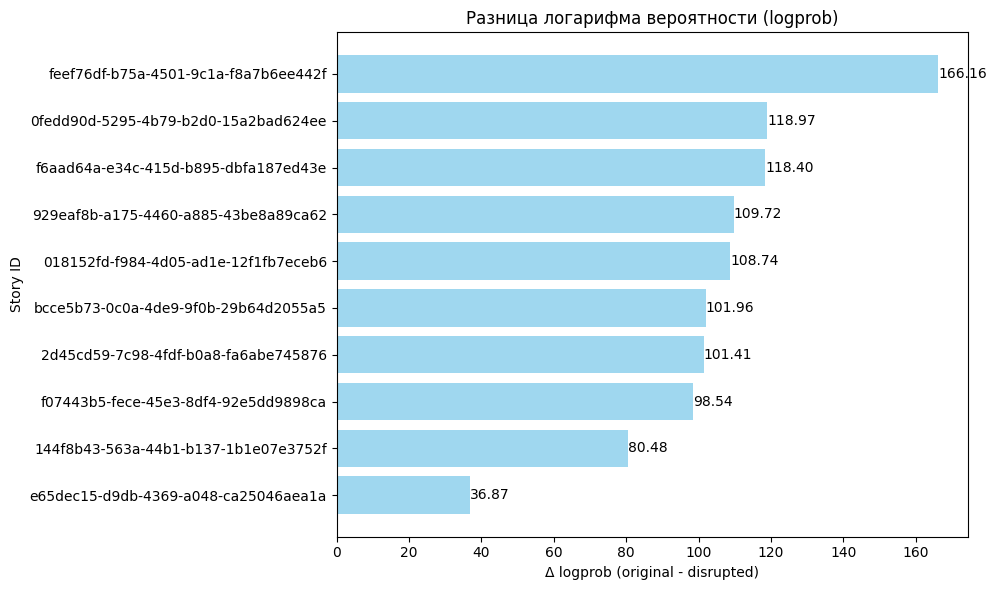

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sorted_df = results_df.sort_values(by="delta_logprob", ascending=False)

bars = plt.barh(sorted_df["InputStoryid"].astype(str), sorted_df["delta_logprob"], color='skyblue', alpha=0.8)
plt.xlabel("Δ logprob (original - disrupted)")
plt.ylabel("Story ID")
plt.title("Разница логарифма вероятности (logprob)")
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.2f}", va='center')

plt.tight_layout()
plt.show()

ppl

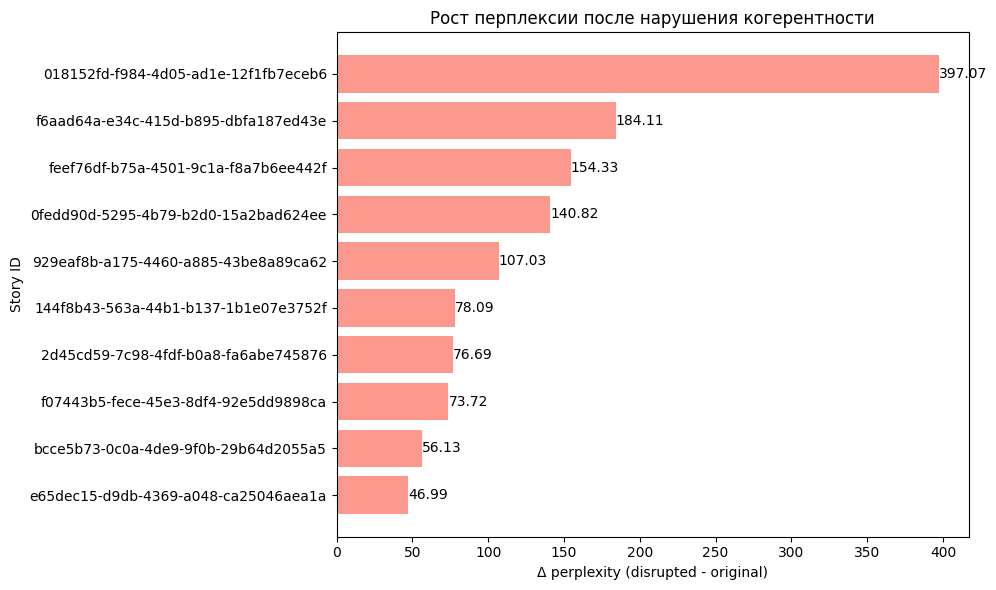

In [ ]:
plt.figure(figsize=(10, 6))
sorted_df = results_df.sort_values(by="delta_ppl", ascending=False)

bars = plt.barh(sorted_df["InputStoryid"].astype(str), sorted_df["delta_ppl"], color='salmon', alpha=0.8)
plt.xlabel("Δ perplexity (disrupted - original)")
plt.ylabel("Story ID")
plt.title("Рост перплексии после нарушения когерентности")
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.2f}", va='center')

plt.tight_layout()
plt.show()

а теперь для всех текстов

In [ ]:
from tqdm import tqdm

tqdm.pandas()

original_metrics = [calculate_logprob_and_ppl(text, model, tokenizer) for text in tqdm(original_df["full_text"], desc="Оригинальные тексты")]
disrupted_metrics = [calculate_logprob_and_ppl(text, model, tokenizer) for text in tqdm(disrupted_df["full_text"], desc="Нарушенные тексты")]

original_logprob, original_ppl = zip(*original_metrics)
disrupted_logprob, disrupted_ppl = zip(*disrupted_metrics)

results_df = pd.DataFrame({
    "InputStoryid": original_df["InputStoryid"],
    "logprob_original": original_logprob,
    "logprob_disrupted": disrupted_logprob,
    "ppl_original": original_ppl,
    "ppl_disrupted": disrupted_ppl
})

results_df["delta_logprob"] = results_df["logprob_original"] - results_df["logprob_disrupted"]
results_df["delta_ppl"] = results_df["ppl_disrupted"] - results_df["ppl_original"]

results_df.sort_values(by="delta_logprob", ascending=False, inplace=True)

Нарушенные тексты: 100%|██████████| 1571/1571 [09:23<00:00,  2.79it/s]


In [ ]:
from sentence_transformers import SentenceTransformer
from numpy.linalg import norm

model_st = SentenceTransformer("all-MiniLM-L6-v2")

def compute_l2_distance(text1, text2, model=model_st):
    emb1 = model.encode([text1])[0]
    emb2 = model.encode([text2])[0]
    return norm(emb1 - emb2)

embedding_distances = [
    compute_l2_distance(o, d)
    for o, d in tqdm(zip(original_df["full_text"], disrupted_df["full_text"]), total=len(original_df), desc="Embedding distance")
]

results_df["embedding_distance"] = embedding_distances

Embedding distance: 100%|██████████| 1571/1571 [02:12<00:00, 11.83it/s]


In [ ]:
sorted_logprob = results_df.sort_values(by="delta_logprob", ascending=False)
sorted_ppl = results_df.sort_values(by="delta_ppl", ascending=False)

In [ ]:
# топ-3 delta_logprob
top_3_logprob = sorted_logprob.head(3)
print("Топ-3 предложения по Δ logprob:")
for index, row in top_3_logprob.iterrows():
    # ID истории и предложения
    story_id = row['InputStoryid']
    original_story = original_df[original_df['InputStoryid'] == story_id]['full_text'].values[0]
    disrupted_story = disrupted_df[disrupted_df['InputStoryid'] == story_id]['full_text'].values[0]

    print(f"Story ID: {story_id}")
    print(f"Оригинальное предложение: {original_story}")
    print(f"Некогерентное предложение: {disrupted_story}")
    print(f"Δ logprob: {row['delta_logprob']}\n")

Топ-3 предложения по Δ logprob:
Story ID: fa2c114b-8619-4c3d-8175-598ab7d34672
Оригинальное предложение: Faith couldn't spell a certain long word. Her mother broke it into syllables and spelled each one. Faith repeated after her mother and wrote the syllables on paper. Then, without looking at the paper, she tried to spell the word. Faith was able to do her math homework alone.
Некогерентное предложение: Faith could n't spell a certain long language_unit . Her mother change_integrity it into syllables and spelled each one . Faith repeated soon her mother and wrote the antepenultima on piece_of_paper . sleep , without squint at the paper , she pass_judgment to recite the word . Faith was unable to do her applied_math homework feel .
Δ logprob: 258.38919496536255

Story ID: 8ef5dd67-ba1b-4cb9-93b2-8dbe541fae69
Оригинальное предложение: Greg and his buddies went to the market to order a custom cake. Greg told the clerk he wanted a cake shaped like a haunted house. The clerk said they had 

In [ ]:
# топ-3 delta_ppl
top_3_ppl = sorted_ppl.head(3)
print("Топ-3 предложения по Δ perplexity:")
for index, row in top_3_ppl.iterrows():
    # ID истории и предложения
    story_id = row['InputStoryid']
    original_story = original_df[original_df['InputStoryid'] == story_id]['full_text'].values[0]
    disrupted_story = disrupted_df[disrupted_df['InputStoryid'] == story_id]['full_text'].values[0]

    print(f"Story ID: {story_id}")
    print(f"Оригинальное предложение: {original_story}")
    print(f"Некогерентное предложение: {disrupted_story}")
    print(f"Δ perplexity: {row['delta_ppl']}\n")

Топ-3 предложения по Δ perplexity:
Story ID: 847c6577-a726-4b3b-8c75-1adb69082d3e
Оригинальное предложение: Alfred and Arthur had been best friends when they were children. Unfortunately, when they got older, they began to fight. They stopped talking to each other for a few years. Finally, they managed to reconcile. They were both sad they had reconciled.
Некогерентное предложение: Alfred and Arthur had never worst friends know kill were children . Unfortunately , when they got older , be auspicate to fight . be stopped talking to love same for a few blue_moon . Finally , kill managed to harmonize . her another do sad they had adjust .
Δ perplexity: 832.6769332885742

Story ID: 803745f2-5db4-453e-9c6b-e27205ec4063
Оригинальное предложение: Becky has a cousin named Ashley. Becky and Ashley used to be friends when they were kids. Ashley started being stupid when she grew up. She went to jail for stealing tampons from a dollar store. Becky lost contact with her.
Некогерентное предложение:

In [ ]:
# сортировка по embedding_distance
sorted_emb = results_df.sort_values(by="embedding_distance", ascending=False)

# топ-3 embedding_distance
top_3_emb = sorted_emb.head(3)
print("Топ-3 предложения по расстоянию эмбеддингов (L2):")
for index, row in top_3_emb.iterrows():
    story_id = row['InputStoryid']
    original_story = original_df[original_df['InputStoryid'] == story_id]['full_text'].values[0]
    disrupted_story = disrupted_df[disrupted_df['InputStoryid'] == story_id]['full_text'].values[0]

    print(f"Story ID: {story_id}")
    print(f"Оригинальное предложение: {original_story}")
    print(f"Некогерентное предложение: {disrupted_story}")
    print(f"Embedding Distance (L2): {row['embedding_distance']:.4f}\n")

Топ-3 предложения по расстоянию эмбеддингов (L2):
Story ID: 438ca490-9f98-42f2-b464-500339ac579c
Оригинальное предложение: When the waiter returned to the table the customers looked ready. She asked the woman what she wanted to eat. The woman began to speak and then stopped. She was no longer sure what she wanted. The waiter put the order in.
Некогерентное предложение: ask the waiter travel to the table the customers looked ready . She asked the bridesmaid do she wanted to eat . The woman began to speak and then stopped . She was no longer sure what she wanted . The skulker put the order in .
Embedding Distance (L2): 1.1104

Story ID: 6dad940e-55e2-4aab-b2f9-453fe3ec9f8a
Оригинальное предложение: I am interested in going back to school to further my education. I would love to go to a beauty college to become a stylist. The industry is always growing and I think I could make a great investment. I submitted a letter of intent and am awaiting admissions to attend. Once I am done with scho

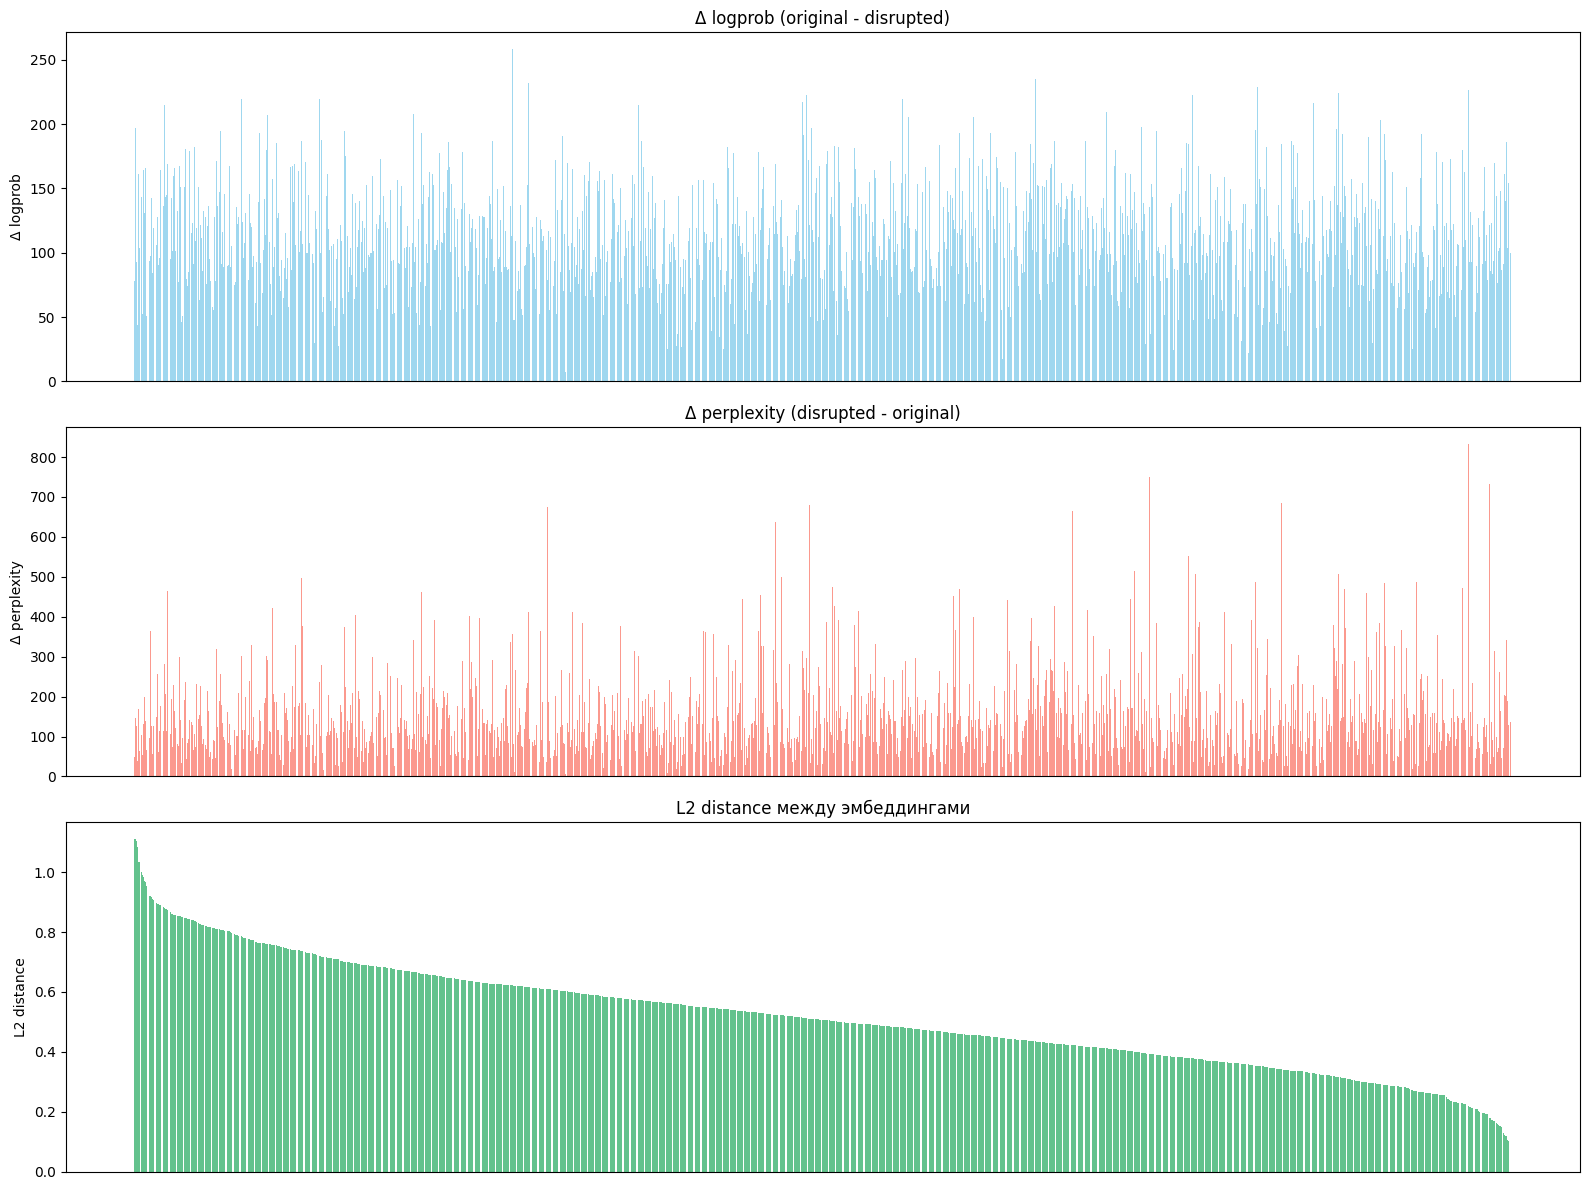

In [ ]:
import matplotlib.pyplot as plt

sorted_df = results_df.sort_values(by="embedding_distance", ascending=False)

fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharex=True)

axes[0].bar(sorted_df["InputStoryid"].astype(str), sorted_df["delta_logprob"], color="skyblue", alpha=0.8)
axes[0].set_title("Δ logprob (original - disrupted)")
axes[0].set_ylabel("Δ logprob")
axes[0].set_xticks([])

axes[1].bar(sorted_df["InputStoryid"].astype(str), sorted_df["delta_ppl"], color="salmon", alpha=0.8)
axes[1].set_title("Δ perplexity (disrupted - original)")
axes[1].set_ylabel("Δ perplexity")
axes[1].set_xticks([])

axes[2].bar(sorted_df["InputStoryid"].astype(str), sorted_df["embedding_distance"], color="mediumseagreen", alpha=0.8)
axes[2].set_title("L2 distance между эмбеддингами")
axes[2].set_ylabel("L2 distance")
axes[2].tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.show()

#визуализация DO

In [ ]:
disrupted_df["Distorted_Story"]

,Distorted_Story
0,Bob was bored at his job as a school teacher. ...
1,Helen went out with Harry on a date. Harry tho...
2,Ferris always fought Jack for headphones. One ...
3,I needed someone who could help me move a bed ...
4,Hannah had a beautiful dog that she loved very...
...,...
1566,Steve was feeling upset so he went to the groc...
1567,Manjul got too tired to live in a new place. S...
1568,Hilda was known to be a pretty girl. People sa...
1569,We learned that Mars would be visible the foll...


In [ ]:
n = 10
original_metrics = [calculate_logprob_and_ppl(text, model, tokenizer) for text in original_df["full_text"][:n]]
disrupted_metrics = [calculate_logprob_and_ppl(text, model, tokenizer) for text in disrupted_df["Distorted_Story"][:n]]

In [ ]:
original_logprob, original_ppl = zip(*original_metrics)
disrupted_logprob, disrupted_ppl = zip(*disrupted_metrics)

In [ ]:
results_df = pd.DataFrame({
    "InputStoryid": original_df["InputStoryid"][:n],
    "logprob_original": original_logprob,
    "logprob_disrupted": disrupted_logprob,
    "ppl_original": original_ppl,
    "ppl_disrupted": disrupted_ppl
})

# дельты
results_df["delta_logprob"] = results_df["logprob_original"] - results_df["logprob_disrupted"]
results_df["delta_ppl"] = results_df["ppl_disrupted"] - results_df["ppl_original"]  # рост перплексии

results_df.sort_values(by="delta_logprob", ascending=False, inplace=True)

results_df.head(10)

,InputStoryid,logprob_original,logprob_disrupted,ppl_original,ppl_disrupted,delta_logprob,delta_ppl
0,f6aad64a-e34c-415d-b895-dbfa187ed43e,-154.025391,-153.393021,24.750912,46.285351,-0.632370,21.534439
7,f07443b5-fece-45e3-8df4-92e5dd9898ca,-188.925108,-184.743067,22.134399,32.645866,-4.182041,10.511467
4,929eaf8b-a175-4460-a885-43be8a89ca62,-130.573402,-118.521404,15.184562,19.356632,-12.051998,4.172071
8,144f8b43-563a-44b1-b137-1b1e07e3752f,-139.337056,-127.120413,19.387300,31.052732,-12.216643,11.665432
1,0fedd90d-5295-4b79-b2d0-15a2bad624ee,-163.887451,-149.361363,30.396330,38.204758,-14.526088,7.808428
3,feef76df-b75a-4501-9c1a-f8a7b6ee442f,-167.957311,-150.395031,16.432951,21.526535,-17.562280,5.093584
9,2d45cd59-7c98-4fdf-b0a8-fa6abe745876,-210.328566,-192.345629,28.178202,50.674408,-17.982937,22.496206
5,e65dec15-d9db-4369-a048-ca25046aea1a,-122.623174,-103.486237,27.498730,53.529873,-19.136938,26.031143
2,018152fd-f984-4d05-ad1e-12f1fb7eceb6,-158.444129,-138.143456,36.634960,65.770103,-20.300673,29.135143
6,bcce5b73-0c0a-4de9-9f0b-29b64d2055a5,-177.349862,-144.724014,22.452480,28.953026,-32.625848,6.500546


In [ ]:
from tqdm import tqdm

tqdm.pandas()

original_metrics = [calculate_logprob_and_ppl(text, model, tokenizer) for text in tqdm(original_df["full_text"], desc="Оригинальные тексты")]
disrupted_metrics = [calculate_logprob_and_ppl(text, model, tokenizer) for text in tqdm(disrupted_df["Distorted_Story"], desc="Нарушенные тексты")]

original_logprob, original_ppl = zip(*original_metrics)
disrupted_logprob, disrupted_ppl = zip(*disrupted_metrics)

results_df = pd.DataFrame({
    "InputStoryid": original_df["InputStoryid"],
    "logprob_original": original_logprob,
    "logprob_disrupted": disrupted_logprob,
    "ppl_original": original_ppl,
    "ppl_disrupted": disrupted_ppl
})

results_df["delta_logprob"] = results_df["logprob_original"] - results_df["logprob_disrupted"]
results_df["delta_ppl"] = results_df["ppl_disrupted"] - results_df["ppl_original"]

results_df.sort_values(by="delta_logprob", ascending=False, inplace=True)

Нарушенные тексты: 100%|██████████| 1571/1571 [05:53<00:00,  4.45it/s]


In [ ]:
from sentence_transformers import SentenceTransformer
from numpy.linalg import norm

model_st = SentenceTransformer("all-MiniLM-L6-v2")

def compute_l2_distance(text1, text2, model=model_st):
    emb1 = model.encode([text1])[0]
    emb2 = model.encode([text2])[0]
    return norm(emb1 - emb2)

embedding_distances = [
    compute_l2_distance(o, d)
    for o, d in tqdm(zip(original_df["full_text"], disrupted_df["Distorted_Story"]), total=len(original_df), desc="Embedding distance")
]

results_df["embedding_distance"] = embedding_distances

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Embedding distance: 100%|██████████| 1571/1571 [00:22<00:00, 70.43it/s]


In [ ]:
sorted_logprob = results_df.sort_values(by="delta_logprob", ascending=False)
sorted_ppl = results_df.sort_values(by="delta_ppl", ascending=False)

In [ ]:
disrupted_df = pd.read_csv('/content/distorted_output.csv')
original_df = pd.read_csv('/content/cloze_test.csv')

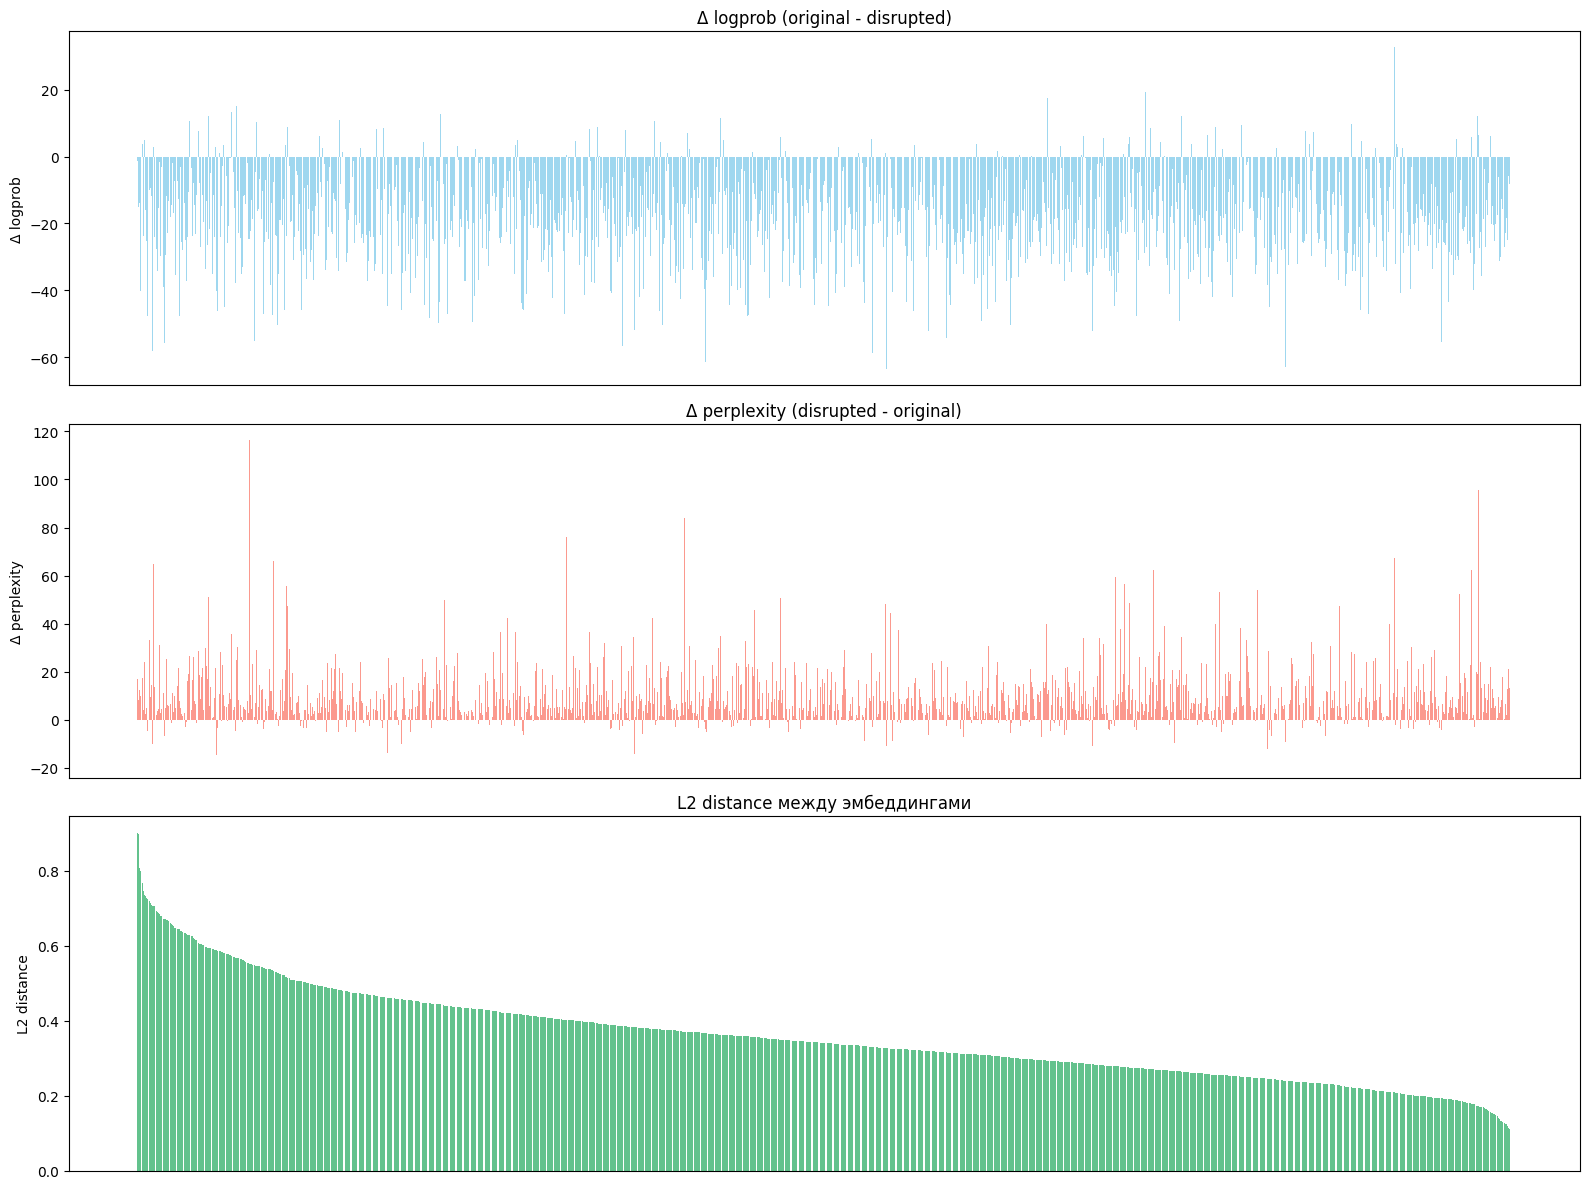

In [ ]:
import matplotlib.pyplot as plt

sorted_df = results_df.sort_values(by="embedding_distance", ascending=False)

fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharex=True)

axes[0].bar(sorted_df["InputStoryid"].astype(str), sorted_df["delta_logprob"], color="skyblue", alpha=0.8)
axes[0].set_title("Δ logprob (original - disrupted)")
axes[0].set_ylabel("Δ logprob")
axes[0].set_xticks([])

axes[1].bar(sorted_df["InputStoryid"].astype(str), sorted_df["delta_ppl"], color="salmon", alpha=0.8)
axes[1].set_title("Δ perplexity (disrupted - original)")
axes[1].set_ylabel("Δ perplexity")
axes[1].set_xticks([])

axes[2].bar(sorted_df["InputStoryid"].astype(str), sorted_df["embedding_distance"], color="mediumseagreen", alpha=0.8)
axes[2].set_title("L2 distance между эмбеддингами")
axes[2].set_ylabel("L2 distance")
axes[2].tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.show()

###анализ текстов из датасета rocstories

Первые записи:
                           InputStoryid  \
0  f6aad64a-e34c-415d-b895-dbfa187ed43e   
1  0fedd90d-5295-4b79-b2d0-15a2bad624ee   
2  018152fd-f984-4d05-ad1e-12f1fb7eceb6   
3  feef76df-b75a-4501-9c1a-f8a7b6ee442f   
4  929eaf8b-a175-4460-a885-43be8a89ca62   

                                      InputSentence1  \
0      Bob was bored at his job as a school teacher.   
1              Olivia went out with Harry on a date.   
2      Jack and Ferris always fought for headphones.   
3  I needed someone to help me move a bed across ...   
4  Hannah had a beautiful cat that she loved very...   

                                      InputSentence2  \
0       He had been working so hard this past month.   
1             Harry thought the date was going well.   
2  One day Jack broke Ferris' headphones while jo...   
3  I called a couple of friends, but they were busy.   
4  However, she noticed that her cat was getting ...   

                                      InputSentence3

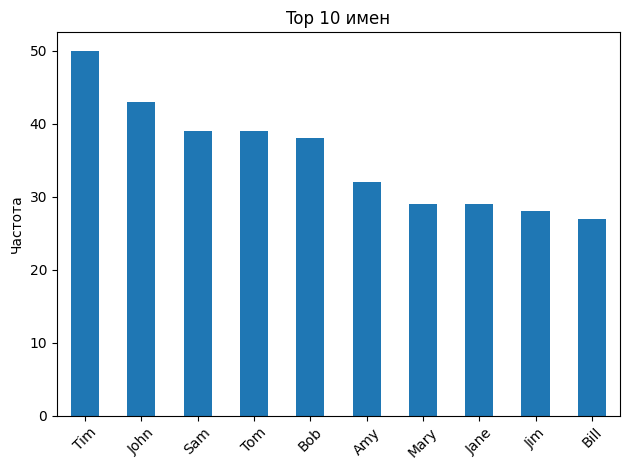

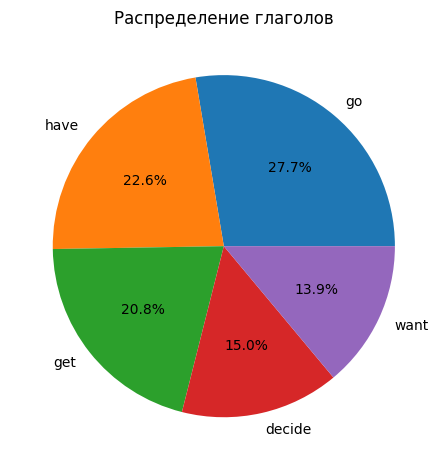

In [ ]:
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm")

# загрузка и показ данных
def load_and_inspect_data(file_path):
    df = pd.read_csv(file_path)
    print("Первые записи:")
    print(df.head())
    print("\nИнформация о структуре данных:")
    print(df.info())
    return df

# анализ количества предложений
def analyze_sentence_structure(df):
    sentence_columns = [col for col in df.columns if col.startswith('InputSentence')]

    # статистика длины предложений
    for col in sentence_columns:
        df[f'{col}_word_count'] = df[col].apply(lambda x: len(str(x).split()))

    print("\nСредняя длина предложений:")
    print(df[[f'{col}_word_count' for col in sentence_columns]].mean())

    return df

# поиск ключевых слов
def extract_keywords(text):
    doc = nlp(text)
    keywords = {
        'entities': [ent.text for ent in doc.ents],
        'verbs': [token.lemma_ for token in doc if token.pos_ == 'VERB'],
        'emotive_words': [token.text for token in doc if token._.in_spacy['affects']]
    }
    return keywords

# анализ историй
def full_analysis(df):
    results = {
        'names': Counter(),
        'verbs': Counter(),
        'locations': Counter(),
        'time_markers': Counter(),
        'emotions': Counter()
    }

    temporal_words = {'day', 'week', 'month', 'year', 'after', 'before', 'next'}
    emotion_lexicon = {'happy', 'sad', 'angry', 'excited', 'bored', 'devastated'}

    for _, row in df.iterrows():
        story = ' '.join([str(row[col]) for col in df.columns if col.startswith('InputSentence')])
        doc = nlp(story)

        # имена и локации
        for ent in doc.ents:
            if ent.label_ == 'PERSON':
                results['names'][ent.text] += 1
            elif ent.label_ == 'GPE' or ent.label_ == 'LOC':
                results['locations'][ent.text] += 1

        # глаголы и маркеры времени
        for token in doc:
            if token.pos_ == 'VERB':
                results['verbs'][token.lemma_] += 1
            if token.text.lower() in temporal_words:
                results['time_markers'][token.text] += 1

        # слова для эмоций
        for word in str(story).split():
            if word.lower() in emotion_lexicon:
                results['emotions'][word] += 1

    return results

def visualize_results(results):
    # график имен
    names = dict(results['names'].most_common(10))
    pd.Series(names).plot(kind='bar', title='Top 10 имен')
    plt.ylabel('Частота')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # диаграмма глаголов
    top_verbs = dict(results['verbs'].most_common(5))
    pd.Series(top_verbs).plot(kind='pie', autopct='%1.1f%%')
    plt.title('Распределение глаголов')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    df = load_and_inspect_data('/content/cloze_test.csv')
    df = analyze_sentence_structure(df)
    analysis_results = full_analysis(df)

    print("\nТоп 10 имен:")
    print(analysis_results['names'].most_common(10))

    print("\nТоп 5 глаголов:")
    print(analysis_results['verbs'].most_common(5))

    visualize_results(analysis_results)

In [ ]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util
from transformers import pipeline
from tqdm import tqdm

sim_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
gen_model = pipeline("text2text-generation", model="google/flan-t5-large", device=0)

df = pd.read_csv("cloze_test.csv")

results = []

for idx, row in tqdm(df.iterrows(), total=len(df)):
    story_id = row['InputStoryid']

    sentences = [
        row['InputSentence1'].strip(),
        row['InputSentence2'].strip(),
        row['InputSentence3'].strip(),
        row['InputSentence4'].strip()
    ]

    # семантические вектора
    embeddings = sim_model.encode(sentences)
    similarities = np.zeros((4, 4))

    for i in range(4):
        for j in range(4):
            if i != j:
                similarities[i, j] = util.cos_sim(embeddings[i], embeddings[j])

    # находим пару наиболее связанных предложений
    i, j = np.unravel_index(similarities.argmax(), similarities.shape)
    to_distort_idx = i
    original_sentence = sentences[to_distort_idx]

    # генерация искажения
    prompt = f"Change the meaning of the sentence to the opposite while keeping the grammar correct: \"{original_sentence}\""
    try:
        distorted_sentence = gen_model(prompt, max_length=64, do_sample=True, temperature=0.8)[0]['generated_text']
    except Exception as e:
        distorted_sentence = "[GENERATION FAILED]"

    distorted_story = sentences.copy()
    distorted_story[to_distort_idx] = distorted_sentence

    results.append({
        "InputStoryid": story_id,
        "DistortedSentenceIndex": to_distort_idx,
        "Original_Sentence": original_sentence,
        "Distorted_Sentence": distorted_sentence,
        "Original_Story": ' '.join(sentences),
        "Distorted_Story": ' '.join(distorted_story)
    })

output_df = pd.DataFrame(results)
output_df.to_csv("distorted_output.csv", index=False)

Device set to use cuda:0
100%|██████████| 1571/1571 [14:22<00:00,  1.82it/s]


In [ ]:
df = pd.read_csv('/content/distorted_output.csv')

In [ ]:
df

,InputStoryid,DistortedSentenceIndex,Original_Sentence,Distorted_Sentence,Original_Story,Distorted_Story
0,f6aad64a-e34c-415d-b895-dbfa187ed43e,1,He had been working so hard this past month.,"He had been working so hard this last night.""",Bob was bored at his job as a school teacher. ...,Bob was bored at his job as a school teacher. ...
1,0fedd90d-5295-4b79-b2d0-15a2bad624ee,0,Olivia went out with Harry on a date.,Helen went out with Harry on a date.,Olivia went out with Harry on a date. Harry th...,Helen went out with Harry on a date. Harry tho...
2,018152fd-f984-4d05-ad1e-12f1fb7eceb6,0,Jack and Ferris always fought for headphones.,Ferris always fought Jack for headphones.,Jack and Ferris always fought for headphones. ...,Ferris always fought Jack for headphones. One ...
3,feef76df-b75a-4501-9c1a-f8a7b6ee442f,0,I needed someone to help me move a bed across ...,I needed someone who could help me move a bed ...,I needed someone to help me move a bed across ...,I needed someone who could help me move a bed ...
4,929eaf8b-a175-4460-a885-43be8a89ca62,0,Hannah had a beautiful cat that she loved very...,Hannah had a beautiful dog that she loved very...,Hannah had a beautiful cat that she loved very...,Hannah had a beautiful dog that she loved very...
...,...,...,...,...,...,...
1566,d6f0ae9a-f2f9-4e17-8ab7-9578c1013b84,2,He came home and preheated the oven to three-h...,"""He came home and preheated the oven to three-...",Steve was feeling upset so he went to the groc...,Steve was feeling upset so he went to the groc...
1567,4d5168e9-f5fd-4aaa-88cc-f92ad2649a44,0,It was time for Manjul to live in a new place.,Manjul got too tired to live in a new place.,It was time for Manjul to live in a new place....,Manjul got too tired to live in a new place. S...
1568,b715186e-ccac-45bd-9db3-d72b429a8b42,2,She wanted to put on a dress and nail polish b...,She hated to put on a dress and nail polish be...,Hilda was known to be a pretty girl. People sa...,Hilda was known to be a pretty girl. People sa...
1569,89858a18-e8fa-4737-9d34-db4b14e7ae96,1,I set an alarm for the early morning.,"""I slept through the alarm.""",We learned that Mars would be visible the foll...,We learned that Mars would be visible the foll...
